**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

**Loading Dataset**

In [58]:
df_train = pd.read_csv(r"C:\Users\LIPSITA_SENAPATI\Desktop\train.csv")
df_test = pd.read_csv(r"C:\Users\LIPSITA_SENAPATI\Desktop\test.csv")

**Display**

In [59]:
df_train.head()

,Key,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved,Unnamed: 17,Unnamed: 18
0,1,NaN,40.83,3.500,u,g,i,bb,0.500,f,f,0,f,s,1160.0,0,-,NaN,NaN
1,2,NaN,32.25,1.500,u,g,c,v,0.250,f,f,0,t,g,372.0,122,-,NaN,NaN
2,3,NaN,28.17,0.585,u,g,aa,v,0.040,f,f,0,f,g,260.0,1004,-,NaN,NaN
3,4,NaN,29.75,0.665,u,g,w,v,0.250,f,f,0,t,g,300.0,0,-,NaN,NaN
4,5,NaN,26.50,2.710,y,p,NaN,NaN,0.085,f,f,0,f,s,80.0,0,-,NaN,NaN


**Size Of The Dataset**

In [60]:
df_train.shape

(590, 19)

**Analysis and Preprocessing of Data**

In [61]:
temp_df = df_train.isnull().sum().reset_index()
temp_df['Percentage'] = (temp_df[0]/len(df_train))*100
temp_df.columns = ['Column Name', 'Number of null values', 'Null values in percentage']
print(f"The length of dataset is \t {len(df_train)}")
temp_df


The length of dataset is 	 590


,Column Name,Number of null values,Null values in percentage
0,Key,0,0.000000
1,Male,11,1.864407
2,Age,0,0.000000
3,Debt,0,0.000000
4,Married,6,1.016949
5,BankCustomer,6,1.016949
6,EducationLevel,9,1.525424
7,Ethnicity,9,1.525424
8,YearsEmployed,0,0.000000
9,PriorDefault,0,0.000000


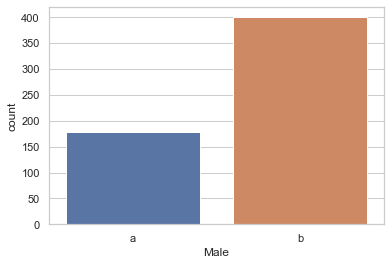

In [62]:
sns.countplot(data=df_train, x='Male')
plt.show()

In [63]:
df_train['Male'].fillna(value='b', inplace=True)

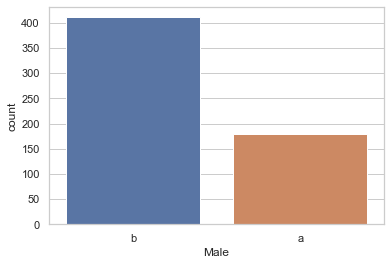

In [64]:
sns.countplot(data=df_train, x='Male')
plt.show()

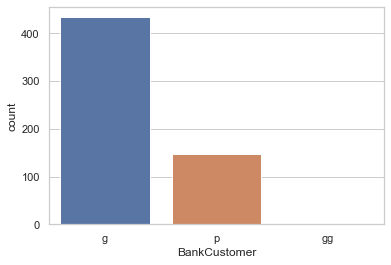

In [65]:
sns.countplot(data=df_train, x='BankCustomer')
plt.show()

In [66]:
df_train['BankCustomer'].fillna(value='g', inplace=True)

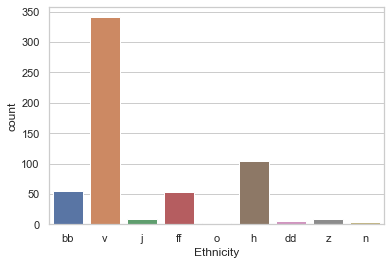

In [67]:
sns.countplot(data=df_train, x='Ethnicity')
plt.show()

In [68]:
df_train['Ethnicity'].fillna(value='v', inplace=True)

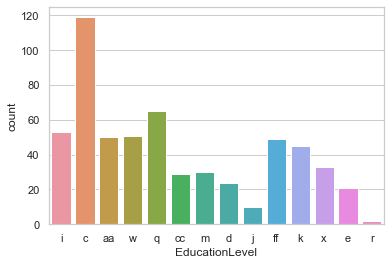

In [69]:
sns.countplot(data=df_train, x='EducationLevel')
plt.show()

In [70]:
df_train['EducationLevel'].fillna(value='c', inplace=True)

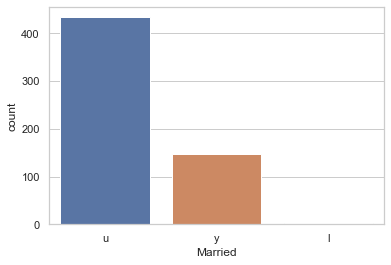

In [71]:
sns.countplot(data=df_train, x='Married')
plt.show()

In [72]:
df_train['Married'].fillna(value='u', inplace=True)

In [73]:
df_train

,Key,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved,Unnamed: 17,Unnamed: 18
0,1,b,40.83,3.500,u,g,i,bb,0.500,f,f,0,f,s,1160.0,0,-,NaN,NaN
1,2,b,32.25,1.500,u,g,c,v,0.250,f,f,0,t,g,372.0,122,-,NaN,NaN
2,3,b,28.17,0.585,u,g,aa,v,0.040,f,f,0,f,g,260.0,1004,-,NaN,NaN
3,4,b,29.75,0.665,u,g,w,v,0.250,f,f,0,t,g,300.0,0,-,NaN,NaN
4,5,b,26.50,2.710,y,p,c,v,0.085,f,f,0,f,s,80.0,0,-,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,586,b,20.50,2.415,u,g,c,v,2.000,t,t,11,t,g,200.0,3000,+,NaN,NaN
586,587,a,29.50,0.460,u,g,k,v,0.540,t,t,4,f,g,380.0,500,+,NaN,NaN
587,588,b,16.17,0.040,u,g,c,v,0.040,f,f,0,f,g,0.0,0,+,NaN,NaN
588,589,b,22.67,0.165,u,g,c,j,2.250,f,f,0,t,s,0.0,0,+,NaN,NaN


In [74]:
X_train=df_train.iloc[:,1:16]
Y_train=df_train.iloc[:,16]
X_test=df_test.iloc[:,1:16]


In [75]:
X_train.drop(["ZipCode"], axis = 1, inplace = True) 
X_test.drop(["ZipCode"], axis = 1, inplace = True)

In [76]:
X_train

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Income
0,b,40.83,3.500,u,g,i,bb,0.500,f,f,0,f,s,0
1,b,32.25,1.500,u,g,c,v,0.250,f,f,0,t,g,122
2,b,28.17,0.585,u,g,aa,v,0.040,f,f,0,f,g,1004
3,b,29.75,0.665,u,g,w,v,0.250,f,f,0,t,g,0
4,b,26.50,2.710,y,p,c,v,0.085,f,f,0,f,s,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,b,20.50,2.415,u,g,c,v,2.000,t,t,11,t,g,3000
586,a,29.50,0.460,u,g,k,v,0.540,t,t,4,f,g,500
587,b,16.17,0.040,u,g,c,v,0.040,f,f,0,f,g,0
588,b,22.67,0.165,u,g,c,j,2.250,f,f,0,t,s,0


In [77]:
X=X_train.iloc[:,0:16].values
y=df_train.iloc[:,16].values
X1=X_test.iloc[:,0:16].values


**Managing categorical variables**

In [78]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
X[:,0] = labelencoder_X_1.fit_transform(X[:,0])
X[:,3] = labelencoder_X_1.fit_transform(X[:,3])
X[:,4] = labelencoder_X_1.fit_transform(X[:,4])
X[:,5] = labelencoder_X_1.fit_transform(X[:,5])
X[:,6] = labelencoder_X_1.fit_transform(X[:,6])
X[:,8] = labelencoder_X_1.fit_transform(X[:,8])
X[:,9] = labelencoder_X_1.fit_transform(X[:,9])
X[:,11] = labelencoder_X_1.fit_transform(X[:,11])
X[:,12] = labelencoder_X_1.fit_transform(X[:,12])

y = labelencoder_X_1.fit_transform(y)

X1[:,0] = labelencoder_X_1.fit_transform(X1[:,0])
X1[:,3] = labelencoder_X_1.fit_transform(X1[:,3])
X1[:,4] = labelencoder_X_1.fit_transform(X1[:,4])
X1[:,5] = labelencoder_X_1.fit_transform(X1[:,5])
X1[:,6] = labelencoder_X_1.fit_transform(X1[:,6])
X1[:,8] = labelencoder_X_1.fit_transform(X1[:,8])
X1[:,9] = labelencoder_X_1.fit_transform(X1[:,9])
X1[:,11] = labelencoder_X_1.fit_transform(X1[:,11])
X1[:,12] = labelencoder_X_1.fit_transform(X1[:,12])


In [82]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


X=pd.DataFrame(X)
X1=pd.DataFrame(X1)


In [195]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print 10 best features

    Specs       Score
8       8  537.542678
10     10  172.185420
9       9  154.792909
7       7   69.952218
2       2   25.610306
3       3   19.017736
13     13   18.952901
4       4   16.417417
1       1   11.332899
5       5    6.682228
12     12    4.892591
0       0    1.468823


In [237]:
X5=X.iloc[:,[8]+[10]+[9]+[7]+[2]+[3]+[13]+[4]+[1]+[5]+[12]+[0]].values
X6=X1.iloc[:,[8]+[10]+[9]+[7]+[2]+[3]+[13]+[4]+[1]+[5]+[12]+[0]].values

**Solving Data-Imbalance Problem**

In [238]:
from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter
X_resampled, y_resampled = SMOTE().fit_resample(X5, y)
#print(sorted(Counter(y_resampled).items()))

X_resampled.shape,y_resampled.shape

((716, 12), (716,))

In [239]:
# Let us Import the Important Libraries  to train our Model for Machine Learning 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split  
from sklearn.model_selection import cross_val_score   
from sklearn.preprocessing import Imputer  
from sklearn.preprocessing import StandardScaler   #

In [240]:
sc_X=StandardScaler()
x_train=sc_X.fit_transform(X_resampled)

x_test = sc_X.fit_transform(X1)

In [241]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
x_train = pca.fit_transform(x_train)

x_test = pca.fit_transform(x_test)
explained_variance = pca.explained_variance_ratio_
explained_variance


array([1.99920494e-01, 1.52800003e-01, 1.01488329e-01, 9.73466087e-02,
       7.65543317e-02, 7.51017960e-02, 6.65579155e-02, 5.21010520e-02,
       4.60492793e-02, 4.46991842e-02, 3.61923918e-02, 2.77507180e-02,
       2.34378964e-02, 1.15821005e-33])

In [242]:
pca = PCA(n_components=5)
x_train = pca.fit_transform(x_train)

x_test = pca.fit_transform(x_test)

# Models Applied

***Logistic Regression***

In [243]:
 # Apply Logistic regression
    # First step is to train our model .

classifier_logi = LogisticRegression()
classifier_logi.fit(x_train,y_resampled)

# Let us check the accuracy of the model with k-cross validation.
accuracy = cross_val_score(estimator=classifier_logi, X=x_train, y=y_resampled, cv=26)
print(f"The accuracy of the Logistic Regressor Model is \t {accuracy.mean()}")
print(f"The deviation in the accuracy is \t {accuracy.std()}")

The accuracy of the Logistic Regressor Model is 	 0.8132924767540152
The deviation in the accuracy is 	 0.09441576310152484


c:\users\lipsita_senapati\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\lipsita_senapati\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\lipsita_senapati\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\lipsita_senapati\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\lipsita

***Random Forest***

In [244]:
# Train Model
classifier_ran = RandomForestClassifier()
classifier_ran.fit(x_train,y_resampled)

# Check the accuracy and deviation in the accuracy
accuracy = cross_val_score(estimator=classifier_ran, X=x_train, y=y_resampled, cv=10)
print(f"The accuracy of the Random Forest Model is \t {accuracy.mean()}") 
print(f"The deviation in the accuracy is \t {accuracy.std()}")


c:\users\lipsita_senapati\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The accuracy of the Random Forest Model is 	 0.8128968253968253
The deviation in the accuracy is 	 0.08402982747073745


In [245]:
!pip install xgboost
from numpy import loadtxt
import xgboost as xgb

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
model = XGBClassifier()
model.fit(x_train, y_resampled)

accuracy = cross_val_score(estimator=model, X=x_train, y=y_resampled, cv=5)
print(f"The accuracy of the xgboost Model is \t {accuracy.mean()}") 
print(f"The deviation in the accuracy is \t {accuracy.std()}")


The accuracy of the xgboost Model is 	 0.8045383411580594
The deviation in the accuracy is 	 0.05817292500040254


***Naive Bayes model***

In [246]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model1 = GaussianNB()

# Train the model using the training sets
model1.fit(x_train, y_resampled)
accuracy = cross_val_score(estimator=model1, X=x_train, y=y_resampled, cv=10)
print(f"The accuracy of the Gaussian Naive Bayes Model is \t {accuracy.mean()}") 
print(f"The deviation in the accuracy is \t {accuracy.std()}")


The accuracy of the Gaussian Naive Bayes Model is 	 0.7905952380952381
The deviation in the accuracy is 	 0.06487532134197092


***KNN***

In [247]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(x_train, y_resampled)
accuracy = cross_val_score(estimator=classifier, X=x_train, y=y_resampled, cv=11)
print(f"The accuracy of the KNeighborsClassifier Model is \t {accuracy.mean()}") 
print(f"The deviation in the accuracy is \t {accuracy.std()}")


The accuracy of the KNeighborsClassifier Model is 	 0.8328168044077134
The deviation in the accuracy is 	 0.06661587932268186


***Multinomial Logistic Regression***

In [248]:
from sklearn.linear_model import LogisticRegression
mul_lr = LogisticRegression(multi_class='multinomial', solver='newton-cg').fit(x_train,y_resampled)
mul_lr.fit(x_train,y_resampled)
accuracy = cross_val_score(estimator=mul_lr, X=x_train, y=y_resampled, cv=5)
print(f"The accuracy of the Multinomial LogisticRegression Model is \t {accuracy.mean()}") 
print(f"The deviation in the accuracy is \t {accuracy.std()}")


The accuracy of the Multinomial LogisticRegression Model is 	 0.8115805946791863
The deviation in the accuracy is 	 0.07346105269070059


***LDA***

In [249]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_resampled)
accuracy = cross_val_score(estimator=lda , X=x_train, y=y_resampled, cv=17)
print(f"The accuracy of the LinearDiscriminantAnalysis Model is \t {accuracy.mean()}") 
print(f"The deviation in the accuracy is \t {accuracy.std()}")


The accuracy of the LinearDiscriminantAnalysis Model is 	 0.8044308632543927
The deviation in the accuracy is 	 0.09155234961552972


In [250]:
print(y[:10])
print(np.unique(y))
print(y[:10])

[1 1 1 1 1 1 1 1 1 1]
[0 1]
[1 1 1 1 1 1 1 1 1 1]


**Prediction Of Test Set**

In [259]:
y_pred = classifier.predict(x_test)

# Let us convert 1 and 0 into + and Charged - respectively
y_pred = list(map(lambda x: '-' if x==1 else '+' ,y_pred))
y_pred = np.array(y_pred)
y_pred[::]

array(['-', '-', '-', '-', '-', '-', '-', '-', '-', '+', '-', '+', '-',
       '-', '-', '-', '-', '-', '-', '-', '-', '-', '+', '-', '+', '-',
       '+', '-', '+', '-', '-', '+', '-', '-', '-', '-', '-', '-', '-',
       '+', '+', '+', '-', '-', '-', '+', '-', '+', '+', '+', '-', '+',
       '+', '+', '+', '+', '+', '+', '+', '-', '+', '+', '+', '-', '+',
       '+', '+', '+', '+', '+', '+', '+', '+', '+', '-', '-', '-', '-',
       '-', '+', '-', '-', '-', '-', '+', '+', '+', '+', '-', '+', '-',
       '-', '-', '+', '+', '+', '+', '-', '+', '+'], dtype='<U1')

In [261]:
submission = pd.DataFrame({
    "Key": df_test.Key, 
    "Approved":y_pred
})

submission.to_csv('credit22.csv', index=False)

In [262]:
t=pd.read_csv('credit22.csv')

In [255]:
t.head

<bound method NDFrame.head of     Key Approved
0     1        -
1     2        -
2     3        -
3     4        -
4     5        +
..  ...      ...
95   96        +
96   97        +
97   98        -
98   99        +
99  100        +

[100 rows x 2 columns]>

![Happy Coding](https://previews.123rf.com/images/dizanna/dizanna1603/dizanna160301774/54253312-thank-you-word-cloud-all-languages.jpg)